## Getting data

In [ ]:
import polars as pl
import polars.selectors as cs
import glob
import pandas as pd



our_f = "./data/position_based.csv"
dss_f = "./dss/new.dss.CpG.hg38DML.csv"
methylkit_f = "./methylkit/new.methylkit..destranded.CpG.hg38.non.window.cov.10.csv"
methylsig_f = "./methylsig/new.methylSig..hg38.non.window.csv"




case_str = "Case"
ctr_str = "Control"


In [2]:
our = pd.read_csv(our_f)
dss = pd.read_csv(dss_f)
methylkit = pd.read_csv(methylkit_f)
methylSig = pd.read_csv(methylsig_f)

## Volcano plot for DSS

/tmp/ipykernel_955343/1532882292.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(significant["diff"].to_numpy() * 100, significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
/tmp/ipykernel_955343/1532882292.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/qgenlab/anaconda3/envs/limma/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


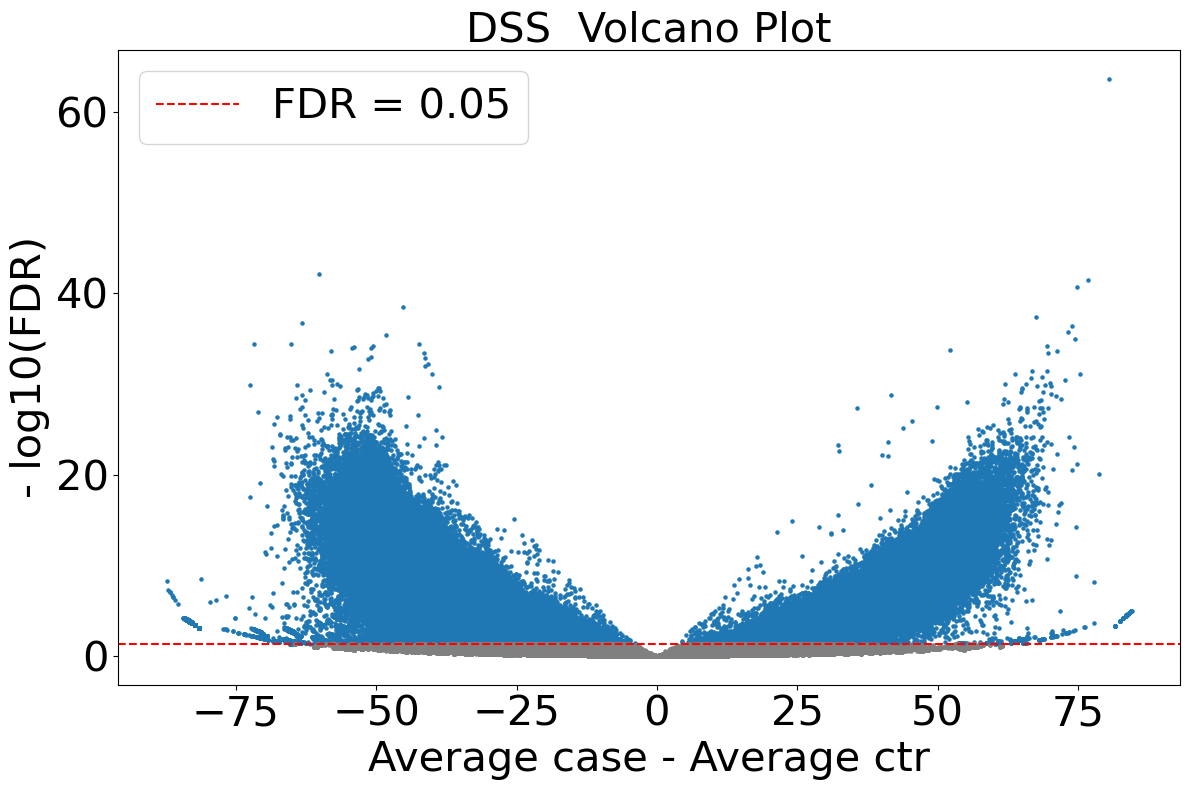

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches



fig, ax = plt.subplots(1,1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
dss["neg_log10_fdr"] = -1 * np.log10(dss["fdr"])
significant = dss[dss["fdr"] < 0.05]
ax.scatter(significant["diff"].to_numpy() * 100, significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
insignificant = dss[dss["fdr"] >= 0.05]
ax.scatter(insignificant["diff"].to_numpy() * 100, insignificant["neg_log10_fdr"].to_numpy(), s=5, c="gray")
ax.axhline(y = np.log10([0.05])[0] * -1, color = 'r', linestyle = '--', label=f'FDR = {0.05}')
ax.set_title("DSS "+ ' Volcano Plot', fontsize=30)
ax.set_xlabel("Average case - Average ctr", fontsize=30)
ax.set_ylabel("- log10(FDR)", fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=30)

plt.tight_layout()


plt.show()

## Volcano plot for methylkit

/home/qgenlab/anaconda3/envs/limma/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_955343/3325892019.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(significant["meth.diff"].to_numpy() , significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
/tmp/ipykernel_955343/3325892019.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


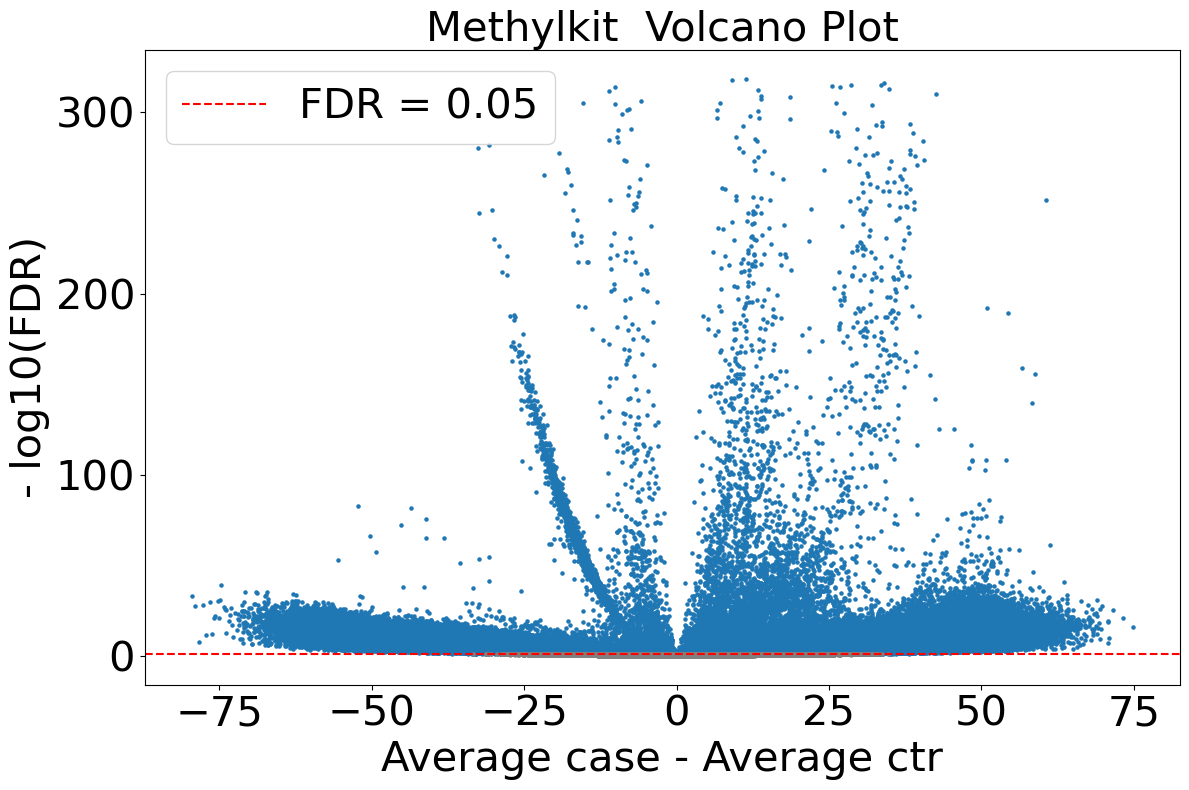

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches



fig, ax = plt.subplots(1,1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
methylkit["neg_log10_fdr"] = -1 * np.log10(methylkit["qvalue"])
significant = methylkit[methylkit["qvalue"] < 0.05]
ax.scatter(significant["meth.diff"].to_numpy() , significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
insignificant = methylkit[methylkit["qvalue"] >= 0.05]
ax.scatter(insignificant["meth.diff"].to_numpy(), insignificant["neg_log10_fdr"].to_numpy(), s=5, c="gray")
ax.axhline(y = np.log10([0.05])[0] * -1, color = 'r', linestyle = '--', label=f'FDR = {0.05}')
ax.set_title("Methylkit "+ ' Volcano Plot', fontsize=30)
ax.set_xlabel("Average case - Average ctr", fontsize=30)
ax.set_ylabel("- log10(FDR)", fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=30)

plt.tight_layout()


plt.show()

## Volcano plot of MethylSig

/tmp/ipykernel_955343/233530525.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(significant["meth_diff"].to_numpy(), significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
/tmp/ipykernel_955343/233530525.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/qgenlab/anaconda3/envs/limma/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


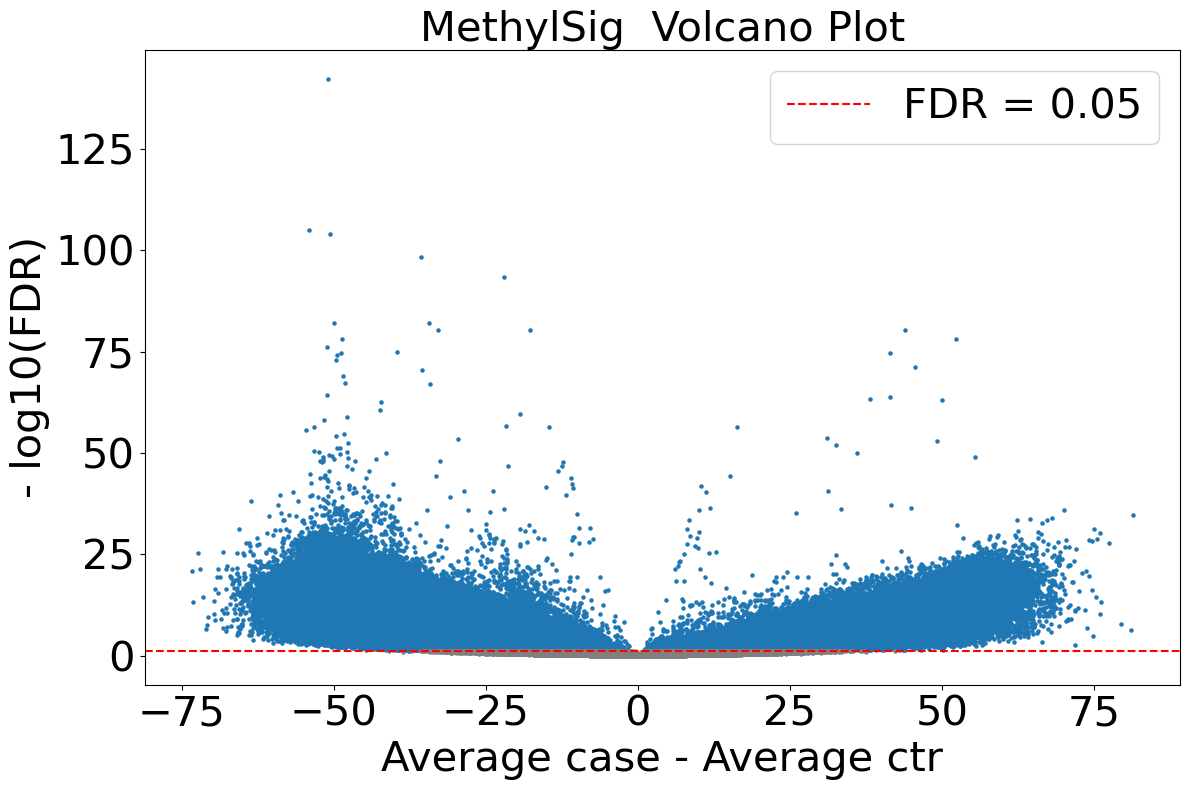

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches



fig, ax = plt.subplots(1,1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
methylSig["neg_log10_fdr"] = -1 * np.log10(methylSig["fdr"])
significant = methylSig[methylSig["fdr"] < 0.05]
ax.scatter(significant["meth_diff"].to_numpy(), significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
insignificant = methylSig[methylSig["fdr"] >= 0.05]
ax.scatter(insignificant["meth_diff"].to_numpy() , insignificant["neg_log10_fdr"].to_numpy(), s=5, c="gray")
ax.axhline(y = np.log10([0.05])[0] * -1, color = 'r', linestyle = '--', label=f'FDR = {0.05}')
ax.set_title("MethylSig "+ ' Volcano Plot', fontsize=30)
ax.set_xlabel("Average case - Average ctr", fontsize=30)
ax.set_ylabel("- log10(FDR)", fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=30)

plt.tight_layout()


plt.show()

## Volcano plot of MethylDiffTools

/tmp/ipykernel_955343/994161253.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(significant["diff"].to_numpy() * 100, significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
/tmp/ipykernel_955343/994161253.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


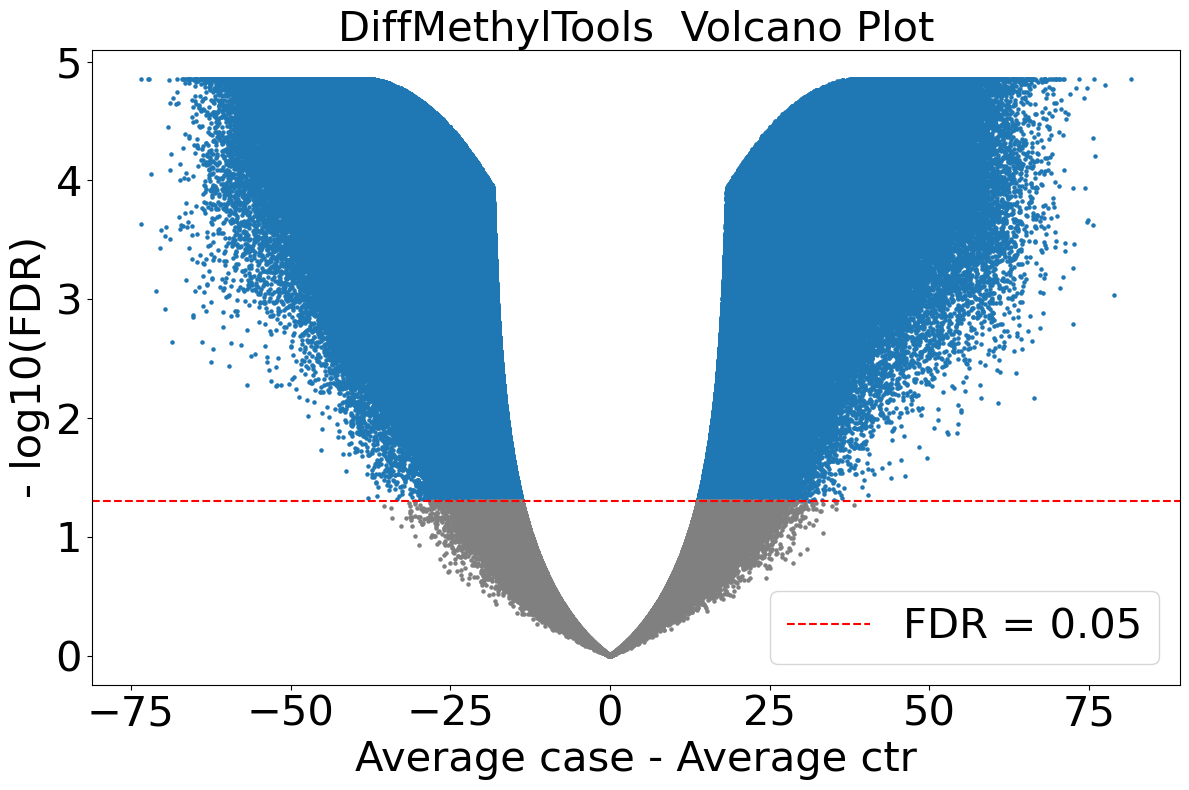

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.patches as mpatches



fig, ax = plt.subplots(1,1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.3)
our["neg_log10_fdr"] = -1 * np.log10(our["q-value"])
significant = our[our["q-value"] < 0.05]
ax.scatter(significant["diff"].to_numpy() * 100, significant["neg_log10_fdr"].to_numpy(), s=5,cmap='viridis')
insignificant = our[our["q-value"] >= 0.05]
ax.scatter(insignificant["diff"].to_numpy() * 100, insignificant["neg_log10_fdr"].to_numpy(), s=5, c="gray")
ax.axhline(y = np.log10([0.05])[0] * -1, color = 'r', linestyle = '--', label=f'FDR = {0.05}')
ax.set_title("DiffMethylTools "+ ' Volcano Plot', fontsize=30)
ax.set_xlabel("Average case - Average ctr", fontsize=30)
ax.set_ylabel("- log10(FDR)", fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.legend(ax.get_legend_handles_labels()[0], ax.get_legend_handles_labels()[1], fontsize=30)

plt.tight_layout()


plt.show()

# Calibration Plots

In [14]:
cohen = pd.read_csv("/mnt/analysis/derbelh/DNA_data_pre/pipeline_project/simulation3/sim.pos.cohen.csv", sep = "\t")
cohen['x'] = cohen['x'].astype(int)

In [15]:
data_our = pd.merge(cohen, our, left_on=["chr", "x"], right_on=["chrom", "chromStart"], how='inner')
data_dss = pd.merge(cohen, dss, left_on=["chr", "x"], right_on=["chr", "pos"], how='inner')
data_methylkit = pd.merge(cohen, methylkit, left_on=["chr", "x"], right_on=["chr", "start"], how='inner')
data_methylSig = pd.merge(cohen, methylSig, left_on=["chr", "x"], right_on=["seqnames", "start"], how='inner')




In [29]:
data_our["c"] = (data_our['cohen_d'].abs() > 0.5).astype(int)
data_our['log_q_value'] = -np.log10(data_our['q-value'])
data_our['log_q_value'] = np.clip(data_our['log_q_value'], None, 100)
bins = np.linspace(0, data_our['log_q_value'].replace([np.inf, -np.inf], np.nan).max(), 50)
data_our['bin'] = pd.cut(data_our['log_q_value'], bins=bins)


data_dss["c"] = (data_dss['cohen_d'].abs() > 0.5).astype(int)
data_dss['log_q_value'] = -np.log10(data_dss['fdr'])
data_dss['log_q_value'] = np.clip(data_dss['log_q_value'], None, 100)
bins = np.linspace(0, data_dss['log_q_value'].replace([np.inf, -np.inf], np.nan).max(), 50)
data_dss['bin'] = pd.cut(data_dss['log_q_value'], bins=bins)


data_methylkit["c"] = (data_methylkit['cohen_d'].abs() > 0.5).astype(int)
data_methylkit['log_q_value'] = -np.log10(data_methylkit['pvalue'])
data_methylkit['log_q_value'] = np.clip(data_methylkit['log_q_value'], None, 100)
bins = np.linspace(0, data_methylkit['log_q_value'].replace([np.inf, -np.inf], np.nan).max(), 50)
data_methylkit['bin'] = pd.cut(data_methylkit['log_q_value'], bins=bins)


data_methylSig["c"] = (data_methylSig['cohen_d'].abs() > 0.5).astype(int)
data_methylSig['log_q_value'] = -np.log10(data_methylSig['fdr'])
data_methylSig['log_q_value'] = np.clip(data_methylSig['log_q_value'], None, 100)
bins = np.linspace(0, data_methylSig['log_q_value'].replace([np.inf, -np.inf], np.nan).max(), 50)
data_methylSig['bin'] = pd.cut(data_methylSig['log_q_value'], bins=bins)


/home/qgenlab/anaconda3/envs/limma/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_955343/1764098559.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1764098559.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1764098559.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1764098559.py:19: Future

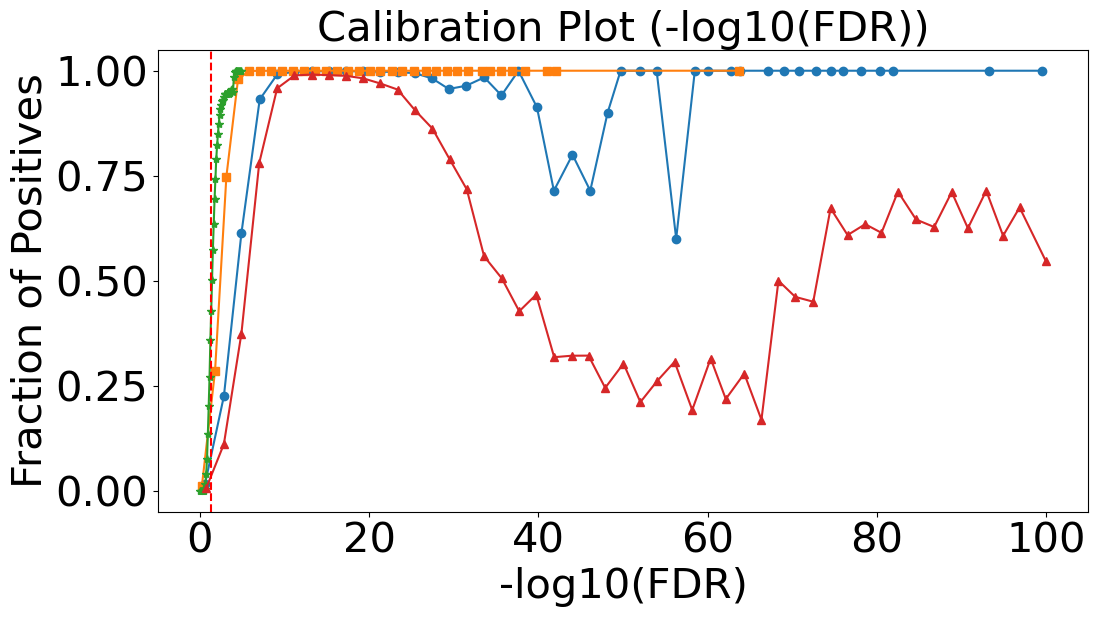

In [50]:
datasets = {
    "MethylSig": data_methylSig,
    "DSS": data_dss,
    "DiffMethylTools": data_our,
    "MethylKit": data_methylkit
}


markers = {
    "DiffMethylTools": '*',
    "MethylSig": 'o',
    "DSS": 's',
    "MethylKit": '^'
}

plt.figure(figsize=(12, 6))

for name, df in datasets.items():
    calibration_df = df.groupby('bin').agg(
        mean_pred_prob=('log_q_value', 'mean'),
        fraction_of_positives=('c', 'mean')
    ).dropna()
    calibration_df_c = calibration_df.copy()
    #calibration_df_c = calibration_df_c[calibration_df_c['mean_pred_prob'] < 10] 
    plt.plot(calibration_df_c['mean_pred_prob'], calibration_df_c['fraction_of_positives'], marker=markers[name], label=name)

significance_cutoff = -np.log10(0.05)
plt.axvline(x=significance_cutoff, color='red', linestyle='--', linewidth=1.5, label='-log10(0.05)')


# plt.xlim(None, 10)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('Calibration Plot (-log10(FDR))', fontsize=30)
plt.xlabel('-log10(FDR)', fontsize=30)
plt.ylabel('Fraction of Positives', fontsize=30)
# plt.legend(fontsize=25, loc='lower right')
plt.show()





/tmp/ipykernel_955343/1217621483.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1217621483.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1217621483.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration_df = df.groupby('bin').agg(
/tmp/ipykernel_955343/1217621483.py:19: Future

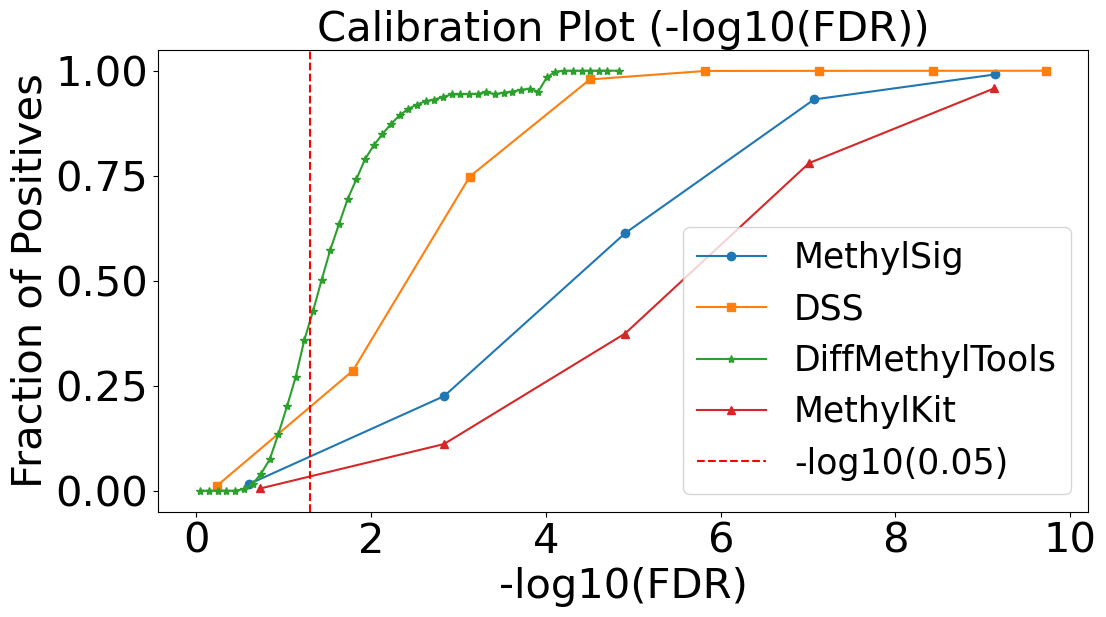

In [51]:
datasets = {
    "MethylSig": data_methylSig,
    "DSS": data_dss,
    "DiffMethylTools": data_our,
    "MethylKit": data_methylkit
}


markers = {
    "DiffMethylTools": '*',
    "MethylSig": 'o',
    "DSS": 's',
    "MethylKit": '^'
}

plt.figure(figsize=(12, 6))

for name, df in datasets.items():
    calibration_df = df.groupby('bin').agg(
        mean_pred_prob=('log_q_value', 'mean'),
        fraction_of_positives=('c', 'mean')
    ).dropna()
    calibration_df_c = calibration_df.copy()
    calibration_df_c = calibration_df_c[calibration_df_c['mean_pred_prob'] < 10] 
    plt.plot(calibration_df_c['mean_pred_prob'], calibration_df_c['fraction_of_positives'], marker=markers[name], label=name)

significance_cutoff = -np.log10(0.05)
plt.axvline(x=significance_cutoff, color='red', linestyle='--', linewidth=1.5, label='-log10(0.05)')


# plt.xlim(None, 10)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.title('Calibration Plot (-log10(FDR))', fontsize=30)
plt.xlabel('-log10(FDR)', fontsize=30)
plt.ylabel('Fraction of Positives', fontsize=30)
plt.legend(fontsize=25, loc='lower right')
plt.show()
